<a href="https://colab.research.google.com/github/Sachiprajapati/ML-Programs/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.63
              precision    recall  f1-score   support

    negative       0.85      0.31      0.45        36
     neutral       0.47      1.00      0.64        30
    positive       0.96      0.65      0.77        34

    accuracy                           0.63       100
   macro avg       0.76      0.65      0.62       100
weighted avg       0.77      0.63      0.62       100

Tweet: I love this new movie!
Predicted Sentiment: positive
--------------------------------------------------
Tweet: The service at this restaurant was terrible.
Predicted Sentiment: neutral
--------------------------------------------------
Tweet: What a fantastic experience at the park today!
Predicted Sentiment: neutral
--------------------------------------------------


<ipython-input-4-1612badd4a96>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['predicted_sentiment'], palette="viridis")


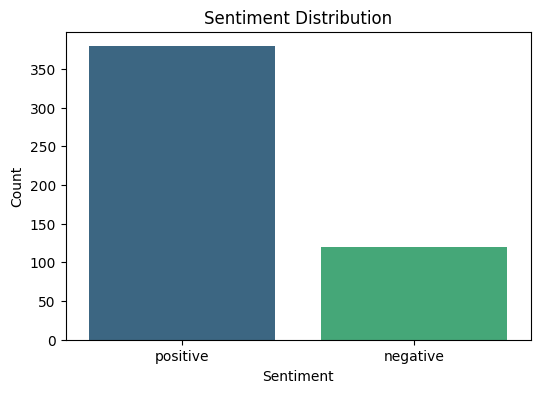

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

file_path = "sentiment_analysis.csv"
df = pd.read_csv(file_path)

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 'positive' if score >= 0 else 'negative'

df['predicted_sentiment'] = df['text'].apply(get_sentiment)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

def predict_sentiment(text):
    transformed_text = vectorizer.transform([text])
    return model.predict(transformed_text)[0]

example_tweets = [
    "I love this new movie!",
    "The service at this restaurant was terrible.",
    "What a fantastic experience at the park today!"
]

for tweet in example_tweets:
    print(f"Tweet: {tweet}\nPredicted Sentiment: {predict_sentiment(tweet)}\n{'-'*50}")

plt.figure(figsize=(6, 4))
sns.countplot(x=df['predicted_sentiment'], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

positive_words = " ".join(df[df['predicted_sentiment'] == 'positive']['text'])
negative_words = " ".join(df[df['predicted_sentiment'] == 'negative']['text'])

